In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("cubesat_speed_data.csv")  # Assuming dataset contains initial_x, initial_y, final_x, final_y, time


In [4]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [5]:
df["distance"] = df.apply(lambda row: calculate_distance(row["initial_x"], row["initial_y"], row["final_x"], row["final_y"]), axis=1)


In [6]:
features = ["distance", "time"]
X = df[features]
y = df["speed"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test_scaled)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.28394908902111227


In [12]:
def predict_speed(x1, y1, x2, y2, time):
    distance = calculate_distance(x1, y1, x2, y2)
    input_data = np.array([[distance, time]])
    input_scaled = scaler.transform(input_data)
    return model.predict(input_scaled)[0]

In [13]:
predicted_speed = predict_speed(871,794,961,824,8)
print(f"Predicted Speed: {predicted_speed} m/s")

Predicted Speed: 11.87921899267082 m/s


c:\Users\surya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


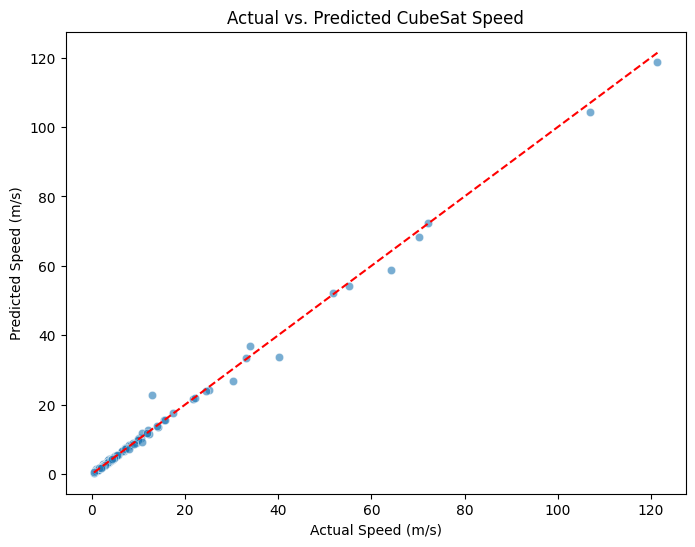

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Speed (m/s)")
plt.ylabel("Predicted Speed (m/s)")
plt.title("Actual vs. Predicted CubeSat Speed")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Reference line
plt.show()

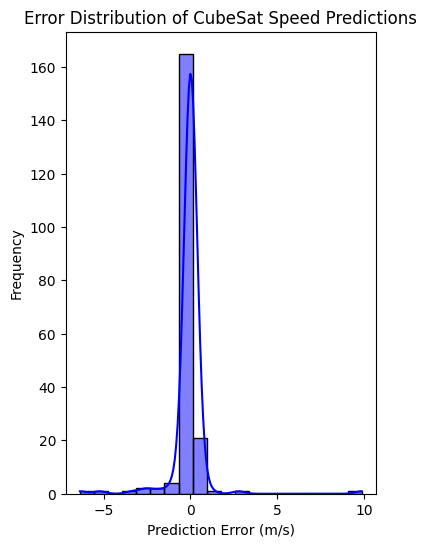

In [19]:
errors = np.array(y_pred) - np.array(y_test)
plt.figure(figsize=(4, 6))
sns.histplot(errors, bins=20, kde=True, color="blue")
plt.xlabel("Prediction Error (m/s)")
plt.ylabel("Frequency")
plt.title("Error Distribution of CubeSat Speed Predictions")
plt.show()

C:\Users\surya\AppData\Local\Temp\ipykernel_32312\1553622417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


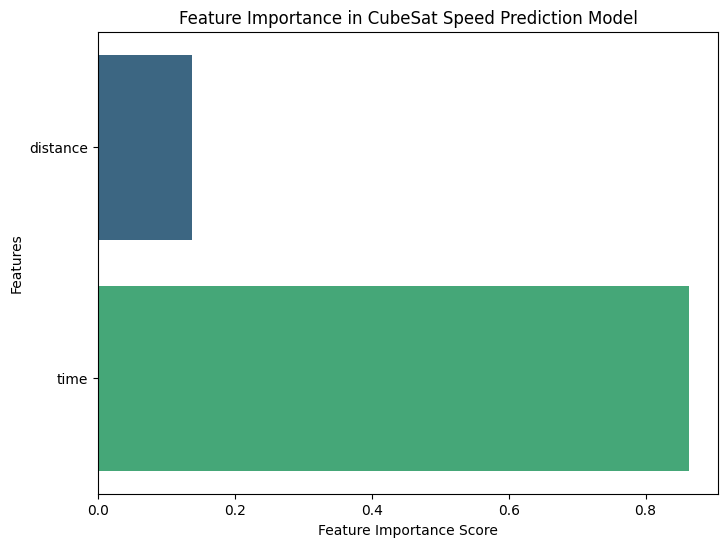

In [18]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in CubeSat Speed Prediction Model")
plt.show()
